__Задание 1__

К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.



__Задание 2__ 

К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.


In [7]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [8]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

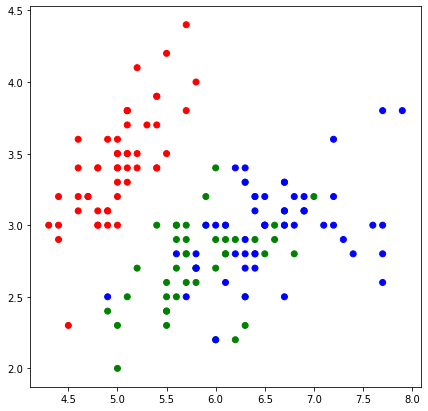

In [10]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [11]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [12]:
def knn(x_train, y_train, x_test, k, weight, q = 0.5):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        if weights == 'number_1':
            i = 1
            for d in sorted(test_distances)[0:k]:
                classes[d[1]] += 1 / i
                i += 1
                
        if weights == 'number_2':
            i = 1
            for d in sorted(test_distances)[0:k]:
                classes[d[1]] += (k - i + 1) / k
                i += 1       
        elif weights == 'distance':
            for d in sorted(test_distances)[0:k]:
                classes[d[1]] += q **d[0]
        else:
             for d in sorted(test_distances)[0:k]:
                classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [13]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [14]:
def get_graph(X_train, y_train, k, weights):   
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = 0.02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, weights)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'Трехклассовая kNN классификация при k = {k} и "{weights}" весах')
    plt.show()

In [15]:
weights_range = ['number_1', 'number_2', 'distance']

__Взвешенное голосование:__

$number1$ : $w(i) = \frac{1}{i}$;\
$number2$ :  $w(i) = \frac{k + 1 - i}{k}$;\
$distance$ : $w(d) = q^{d}$


Точность алгоритма при k = 7 и "number_1" весах: 0.833


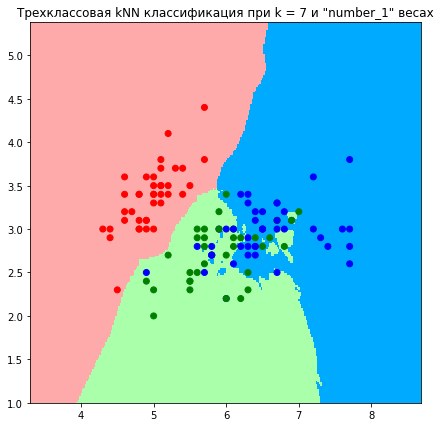

Точность алгоритма при k = 7 и "number_2" весах: 0.833


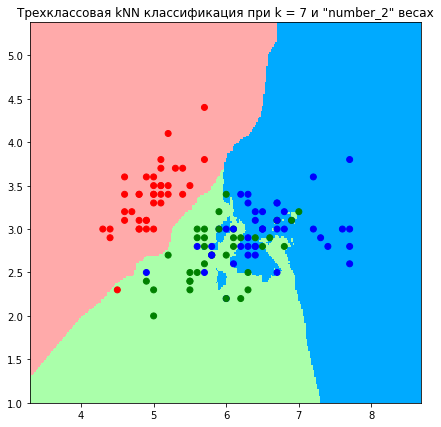

Точность алгоритма при k = 7 и "distance" весах: 0.800


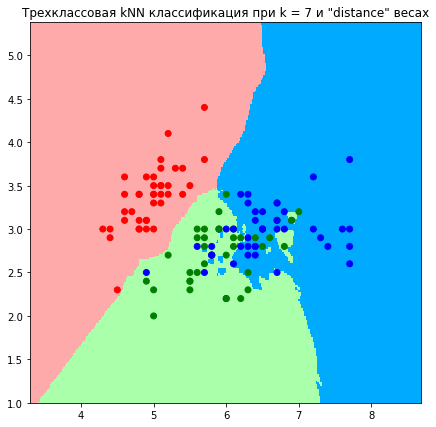

In [17]:
k = 7

for weights in weights_range:
    y_pred = knn(X_train, y_train, X_test, k, weights, q = 0.5)
    score = accuracy(y_pred, y_test)
    
    print(f'Точность алгоритма при k = {k} и "{weights}" весах: {score:.3f}')
    
    get_graph(X_train, y_train, k, weights)

При k = 7, точность незначительно отличается у всех трех методов взвешенного голосования. 

Точность алгоритма при k = 2 и "number_1" весах: 0.667


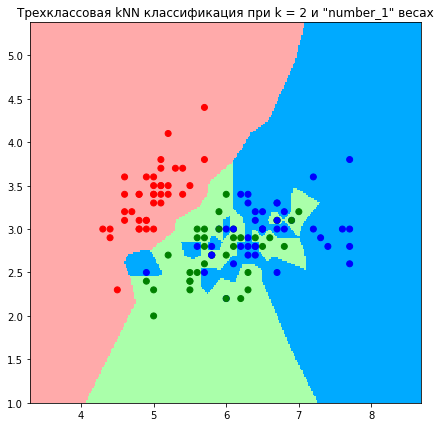

Точность алгоритма при k = 2 и "number_2" весах: 0.667


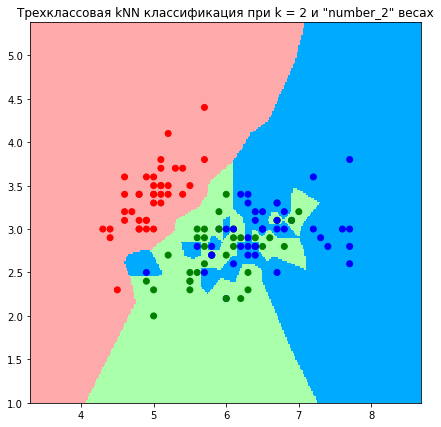

Точность алгоритма при k = 2 и "distance" весах: 0.733


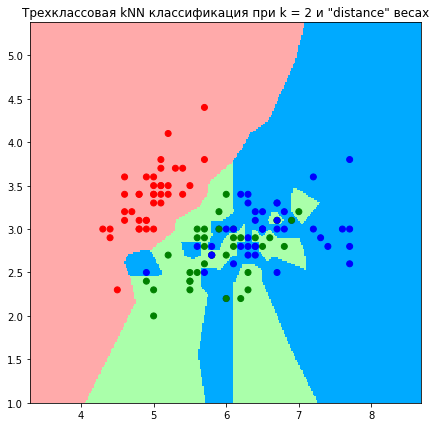

In [18]:
k = 2

for weights in weights_range:
    y_pred = knn(X_train, y_train, X_test, k, weights, q=0.5)
    score = accuracy(y_pred, y_test)
    
    print(f'Точность алгоритма при k = {k} и "{weights}" весах: {score:.3f}')
    get_graph(X_train, y_train, k, weights)

При k =2, наилучший результат у метода голосования по расстоянию до соседей.